# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:

import scipy
scipy.__version__

'1.7.3'

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount =True)

Mounted at /content/drive


In [ ]:
path=('/content/drive/MyDrive/Pandas1/Project2/abtest.csv')

enews=pd.read_csv(path)

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
enews.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
enews.shape

(100, 6)

In [ ]:

enews.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Observations



*   The first and last few items shows data was correctly loaded as per the data dictionary

*   The data contains 100 rows and 6 columns

*   The average time spent on the page is 5.3778 minutes, a standard deviation of 2.37817
*   The minimum and maximum time a user spent on the page are 0.19 minutes and 10.71

*   50% of users spent 5.415 minutes on the page
*   Spanish was the most preferred language and 54 users were converted









In [ ]:
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
enews.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
enews.duplicated().value_counts()

False    100
dtype: int64

##Observations



*   There are no missing values
*   There are no dulicates
*   There are two numerical columns and four categorical columns







### Univariate Analysis

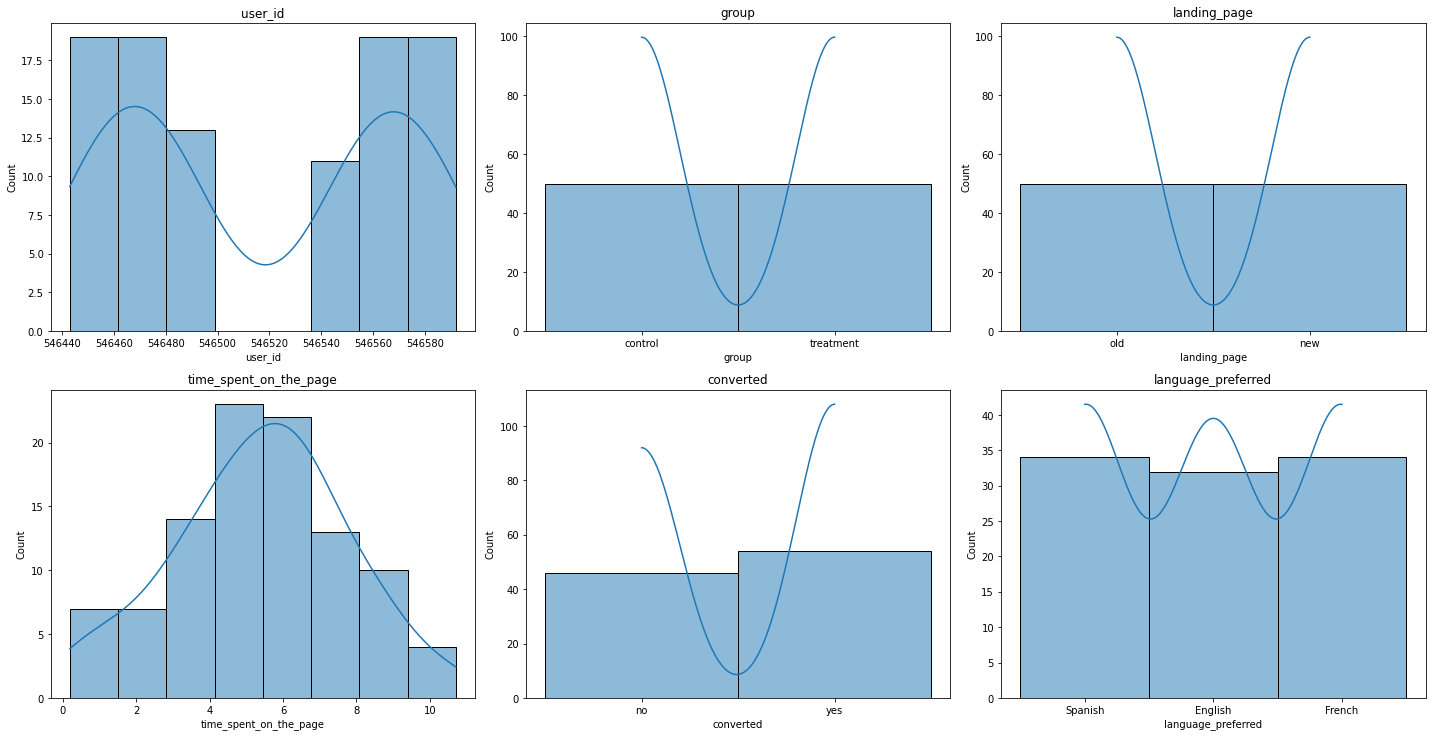

In [ ]:

columns=['user_id','group','landing_page','time_spent_on_the_page','converted','language_preferred']
plt.figure(figsize=(20,15))

for i, variable in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.histplot(enews,x=enews[variable],kde=True);
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observations

Time spent on the page shows a normal distribution

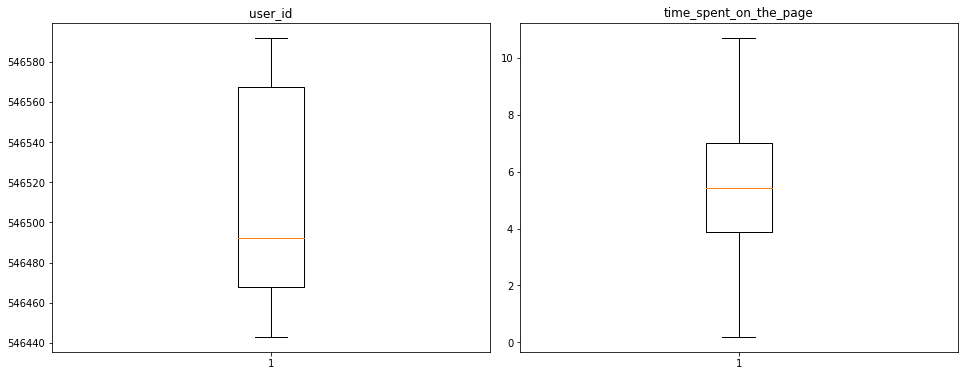

In [ ]:

numerical_columns=['user_id','time_spent_on_the_page']
plt.figure(figsize=(20,15))

for i, variable in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(enews[variable], whis=1.5);
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observations

User ID is skewed to the right where as time spent on the page shows no skewness

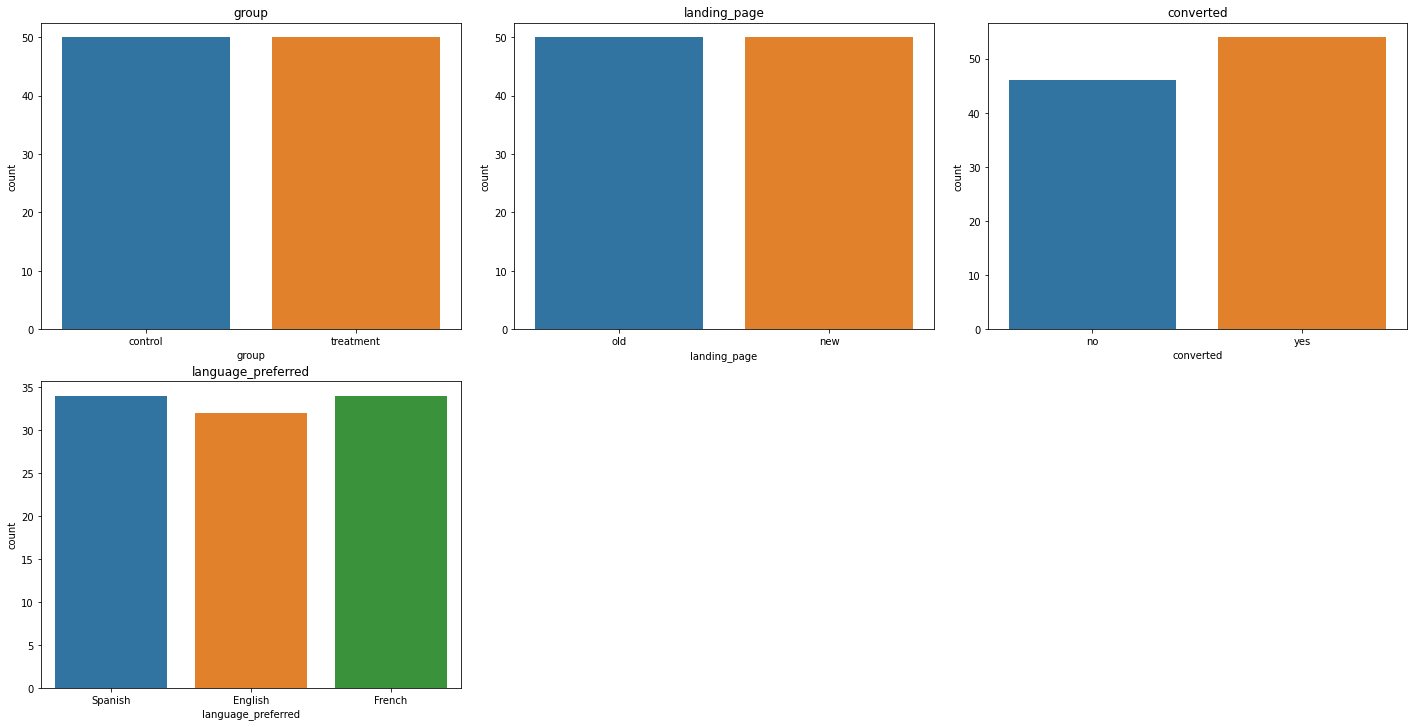

In [ ]:

cat_columns=['group','landing_page','converted','language_preferred']
plt.figure(figsize=(20,15))

for i, variable in enumerate(cat_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=enews,x=enews[variable]);
    plt.tight_layout(pad=2)
    plt.title(variable)


plt.show()

### Bivariate Analysis

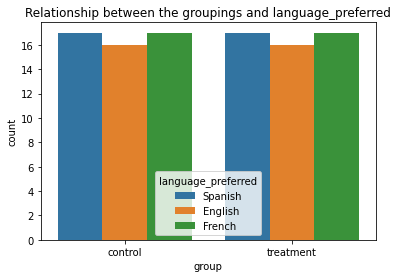

In [ ]:
sns.countplot(data=enews,x='group',hue='language_preferred')
plt.title('Relationship between the groupings and language_preferred')
plt.show()

##Observations

The language preferred is equal among the two groups

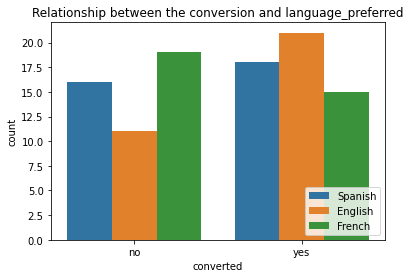

In [ ]:
sns.countplot(data=enews,x='converted',hue='language_preferred')
plt.title('Relationship between the conversion and language_preferred')
plt.legend(loc='lower right')
plt.show()

##Observations

English is the most preferred language among users that finally subscribed where as French is the most preferred among users who did not subscribe

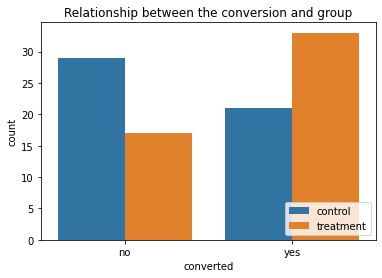

In [ ]:
sns.countplot(data=enews,x='converted',hue='group')
plt.title('Relationship between the conversion and group')
plt.legend(loc='lower right')
plt.show()

##Observations

Almost 30 users in the control group did not subscribe, where as about 20 of them subscribed to the news portal

Also almost 35 users of the treatment group subscribed to the news portal, whereas about 15 of them did not

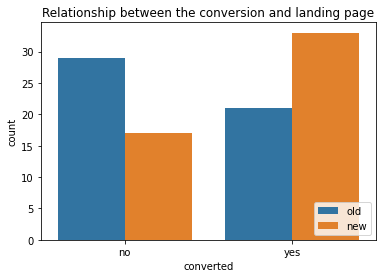

In [ ]:
sns.countplot(data=enews,x='converted',hue='landing_page')
plt.title('Relationship between the conversion and landing page')
plt.legend(loc='lower right')
plt.show()

##Observations

Almost 30 users that were served with the old landing page did not subscribe, where as about 20 of them subscribed to the news portal

Also almost 35 users that were served the new landing page subscribed to the news portal, whereas about 15 of them did not

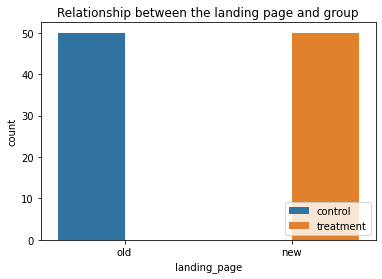

In [ ]:
sns.countplot(data=enews,x='landing_page',hue='group')
plt.title('Relationship between the landing page and group')
plt.legend(loc='lower right')
plt.show()

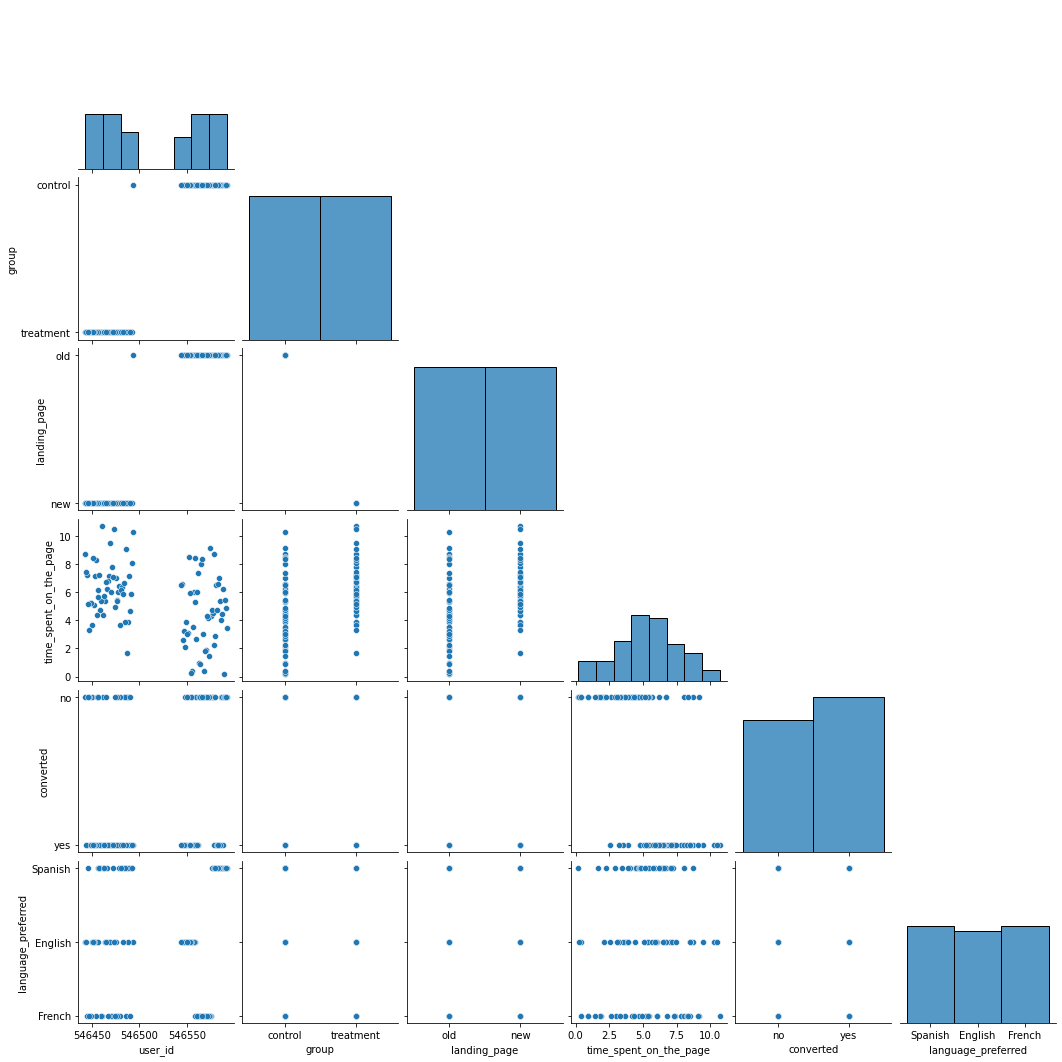

In [ ]:
sns.pairplot(data=enews, vars=columns, corner=True);

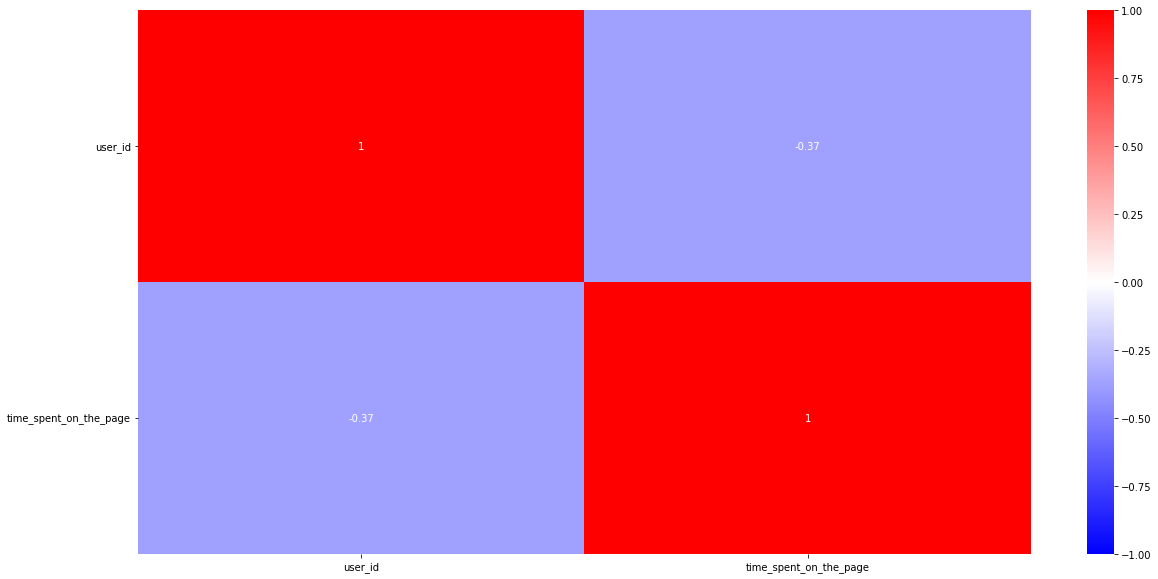

In [ ]:
plt.figure(figsize=(20,10))
corr=enews.corr()
#mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=enews.corr(), annot=True, cmap='bwr',vmin=-1,vmax=1)
plt.yticks(rotation=0)
plt.show()

##Observations

From the two plots above, there are no correlation between the various variables

<Figure size 2160x1080 with 0 Axes>

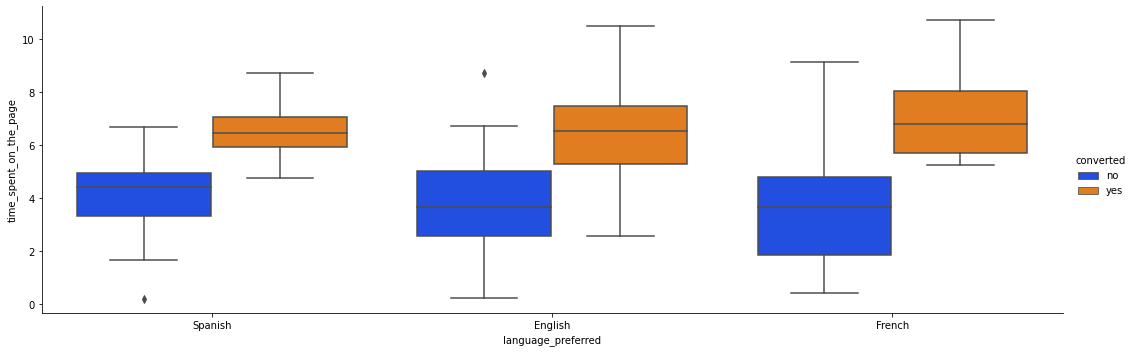

In [ ]:

plt.figure(figsize=(30,15))
sns.catplot(data=enews,x='language_preferred',y='time_spent_on_the_page', hue='converted', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.show()

##Observations

Among all the preferred languages the median time spent on the page was higher for users who subscribed compared to those who did not.

<Figure size 2160x1080 with 0 Axes>

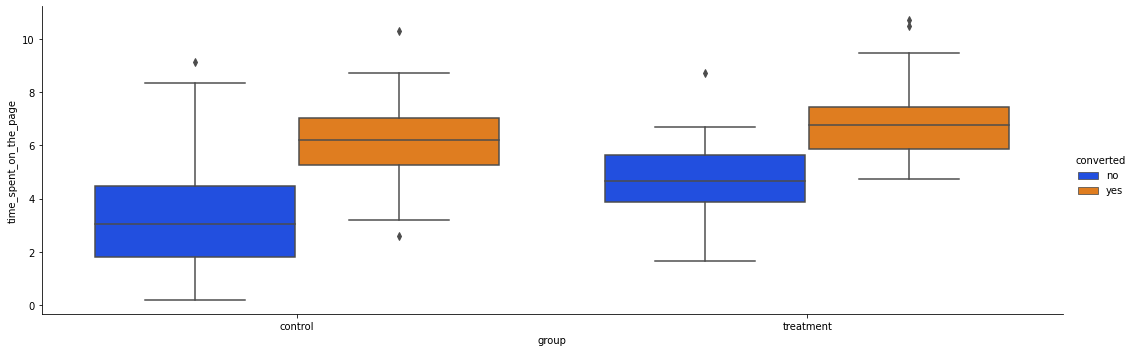

In [ ]:


plt.figure(figsize=(30,15))
sns.catplot(data=enews,x='group',y='time_spent_on_the_page', hue='converted', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.show()

##Observations

Among all the groups the median time spent on the page was higher for users who subscribed compared to those who did not.

We do also notice some outliers in almost all the box plots

<Figure size 2160x1080 with 0 Axes>

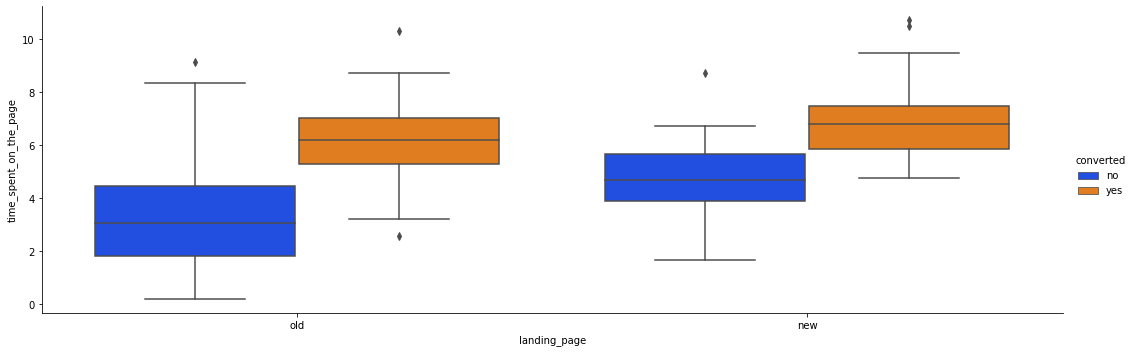

In [ ]:


plt.figure(figsize=(30,15))
sns.catplot(data=enews,x='landing_page',y='time_spent_on_the_page', hue='converted', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.show()

##Observations

Among all the landing pages the median time spent on the page was higher for users who subscribed compared to those who did not.

We do also notice some outliers in almost all the box plots

<Figure size 2160x1080 with 0 Axes>

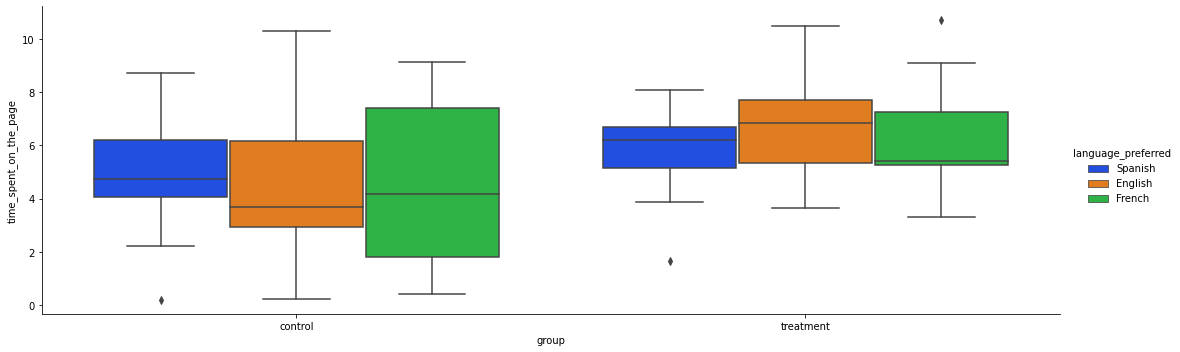

In [ ]:


plt.figure(figsize=(30,15))
sns.catplot(data=enews,x='group',y='time_spent_on_the_page', hue='language_preferred', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.show()

##Observations

The boxplot for Spanish and English language are right skewed for the control group where as same languages are left skewed for the treatment group

<Figure size 2160x1080 with 0 Axes>

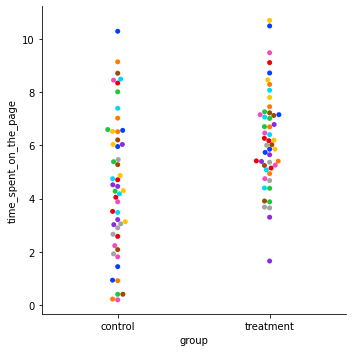

In [ ]:

plt.figure(figsize=(30,15))
sns.catplot(data=enews,x='group',y='time_spent_on_the_page', hue='user_id', kind='swarm',palette ='bright',legend=None)
plt.show()

##Observations

Users in the tratment group spent more time on the page compared to the control group

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Figure size 1440x720 with 0 Axes>

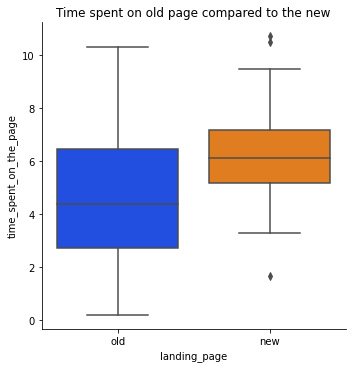

In [ ]:

plt.figure(figsize=(20,10))
sns.catplot(data=enews,x='landing_page',y='time_spent_on_the_page', kind='box',palette ='bright')
plt.title('Time spent on old page compared to the new')
plt.show()


##Observations

From the boxplot above, the median time spent on the new page is more than that of the old page.

<Figure size 1440x720 with 0 Axes>

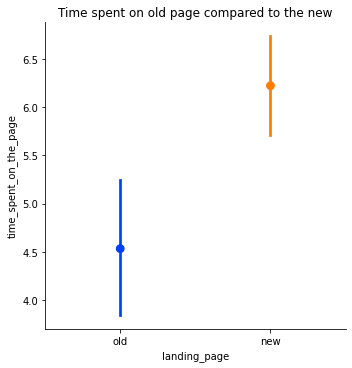

In [ ]:

plt.figure(figsize=(20,10))
sns.catplot(data=enews,x='landing_page',y='time_spent_on_the_page', kind='point',palette ='bright')
plt.title('Time spent on old page compared to the new')
plt.show()

Observations

From the pointplot above, it is also clear that the median time spent on the new page is more than that of the old page

### Step 1: Define the null and alternate hypotheses







Let $\mu_1, \mu_2$ be the mean time spent on the **new** and **old landing pages** respectively

The null hypothesis

>$H_0:\mu_1=\mu_2$

The alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

In [ ]:
#checking means and standard deviations of time spent on the new and old landing pages

print('The mean time spent on the new landing page is ' + str(round(enews[enews['landing_page']=='new']['time_spent_on_the_page'].mean(), 2)))
print('The mean time spent on the old landing page is ' + str(round(enews[enews['landing_page']=='old']['time_spent_on_the_page'].mean(), 2)))
print('The standard deviation of time spent on the new landing page is ' + str(round(enews[enews['landing_page']=='new']['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of time spent on the old landing page is ' + str(round(enews[enews['landing_page']=='old']['time_spent_on_the_page'].std(), 2)))

The mean time spent on the new landing page is 6.22
The mean time spent on the old landing page is 4.53
The standard deviation of time spent on the new landing page is 1.82
The standard deviation of time spent on the old landing page is 2.58


##Confirming assumptions to decide appropriate test

● Time spent on the page is measured on a continous scale, hence data is **Continuous**

● Per the histogram from the univariate analysis **time spent on the page** shows **normal distribution**

● The two samples are **independent of each other** since the old page was served to the control group and the new page to the treatment group

● Both samples have **unequal standard deviations** as per result from calculation, hence population standard deviation is assume to be different

● it was stated that sample was **randomly** selected from
the population



### Based on the satisfaction of above assumptions We can use the **two sample T-test** for this problem.

### Step 3: Decide the significance level

### This is already stated in the objectives to perform a statistical analysis at a 5% significance level

**I am going to stick with the 5% significance level**

### Step 4: Collect and prepare data

In [ ]:
#Time spent on the new page
tnewpage=enews[enews['landing_page']=='new']['time_spent_on_the_page']
tnewpage

In [ ]:
#Time spent on old page
toldpage=enews[enews['landing_page']=='old']['time_spent_on_the_page']
toldpage

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

test_stat, p_value=ttest_ind(tnewpage,toldpage, equal_var=True, alternative='greater')
print('The p-value is ', p_value)

The p-value is  0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$


In [ ]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the pvalue (~0.00013) is less than the level of significance, we reject the null hypothesis. Hence, we have enough statistical evidence to say that  the users spend more time on the new landing page than on the old landing page.

**A similar approach can be followed to answer the other questions.**

## **2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

### Step 1: Defining the null and alternate hypotheses

#### Stating the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who were converted on the **new** and **old** pages respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Selecting Appropriate test

#### Checking whether the **Two Proportion Z-test** assumptions are satisfied or not

*   Binomally distributed population - Yes, the user either subscribe or not subscribe
*   Random sampling from the population - Yes, we are informed that users were randomly selected
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{29}{50} =29 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-29}{50} =21 \geq 10 $

### Step 3: Deciding the significance level

> This is already stated in the objectives to perform a statistical analysis at a 5% significance level

### Step 4: Collecting and preparing data

In [ ]:
#checking the proportion of users that subscribed on both new and old pages
propcon=enews.groupby(['converted'])['landing_page'].value_counts()
propcon

converted  landing_page
no         old             29
           new             17
yes        new             33
           old             21
Name: landing_page, dtype: int64

>For the new page out of 50 users, 33 users subscribed or were converted and 17 users did not subscribe or were not converted.

>For the old page out of 50 users, 29 users subscribed or were converted and 21 users did not subscribe or were not converted.


At 5% level of significance, will need to check if there is enough statistical evidence to conclude that the conversion rate for users who visited the new page is greater than the conversion rate for the users who visited the old page

### Step 5: Finding the p-value

In [ ]:

from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
conv_count = np.array([33, 29])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conv_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.4098908969616104


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.4098908969616104 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Drawing inference

Since the pvalue (~0.40989) is greater than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that  the conversion rate for the new page is greater than the conversion rate for the old page.

## **3. Is the conversion and preferred language are independent or related?**

### Step 1: Defining the null and alternate hypotheses

### The null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ conversion depend on preferred language.

### Step 2: Selecting Appropriate test

>The formulated hypotheses can be tested using a **Chi-square test of independence** of attributes, concerning the two categorical variables

 Checking whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the users were randomly selected.


### Step 3: Deciding the significance level

> As stated level of significance will be α= 0.05.

### Step 4: Collecting and preparing data

In [ ]:
# create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(enews['converted'],enews['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Finding the p-value

In [ ]:
# use chi2_contingency() to find the p-value
from scipy.stats import chi2_contingency


chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


## Step 6: Compare the p-value with $\alpha$

In [ ]:

# Comparing the p-value with α
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Drawing inference

Since the pvalue (~0.213) is greater than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that conversion depend on preferred language

## **4. Is the time spent on the new page same for the different language users?**

In [ ]:

newpage=enews[enews['landing_page']=='new']


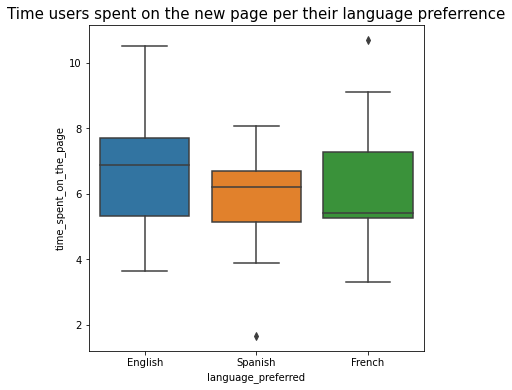

In [ ]:
# draw the boxplot for visualization
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= 'language_preferred', y = 'time_spent_on_the_page' , data = newpage)
a.set_title("Time users spent on the new page per their language preferrence", fontsize=15)
plt.show()

### Step 1: Defining the null and alternate hypotheses

### The null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for the different language users English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean of user preferred language time spent on the new page is different from the rest.

### Step 2: Selecting Appropriate test

**One-way ANOVA Test will used to perform test**

Now, the normality and equality of variance assumptions need to be checked.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [ ]:
from scipy import stats

#find the p-value
w, p_value = stats.shapiro(newpage['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the time spent on the new page follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
from scipy.stats import levene
statistic, p_value = levene( newpage['time_spent_on_the_page'][newpage['language_preferred']=='English'],
                                   newpage['time_spent_on_the_page'][newpage['language_preferred']=='French'],
                                   newpage['time_spent_on_the_page'][newpage['language_preferred']=='Spanish'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than the significance level, we fail to reject the null hypothesis that all the population variances are equal.

### checking whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the users were randomly selected.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Step 3: Deciding the significance level

> As stated level of significance will be α= 0.05.

### Step 4: Collecting and preparing data

In [ ]:
newpage=enews[enews['landing_page']=='new']

### Step 5: Finding the p-value

In [ ]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, pvalue = f_oneway(newpage.loc[newpage['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              newpage.loc[newpage['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              newpage.loc[newpage['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(pvalue))

The p-value is 0.43204138694325955


## Step 6: Compare the p-value with $\alpha$

In [ ]:
# Comparing the p-value with α
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Drawing inference

Since the pvalue (~0.432) is greater than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that at least one mean of user preferred language time spent on the new page is different from the rest

## Conclusion and Business Recommendations

1.   We have enough statistical evidence to say that the users spend more time on the new landing page than on the old landing page. The **recommendation** will be the company to invest more in the new page.

2.   We do not have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page. The **recommendation** will be to collect data for much larger population to test the hypothesis again

3.   since we do not have enough statistical evidence to say that conversions depend on preferred language. The **recommendation** will be to collect data for much larger population to test the hypothesis again

4.   Since we do not have enough statistical evidence to say that at least one mean of user preferred language time spent on the new page is different from the rest.
The **recommendation** will be to collect data for much larger population to test the hypothesis again


In general I will recommend the company undertake a user survey to understand what will most excite them to keep them longer on the page, this will help in designing appropriate page that will make users spend longer time on the page   




___